# TED Talk EDA

## Dataset loading

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv("ted_data.csv")
df

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...
...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,https://ted.com/talks/hans_rosling_the_best_st...
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,https://ted.com/talks/majora_carter_greening_t...
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,https://ted.com/talks/david_pogue_simplicity_s...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [3]:
df.describe()

,views,likes
count,5.440000e+03,5.440000e+03
mean,2.061576e+06,6.260762e+04
std,3.567098e+06,1.076468e+05
min,5.320000e+02,1.500000e+01
25%,6.707500e+05,2.000000e+04
50%,1.300000e+06,4.050000e+04
75%,2.100000e+06,6.500000e+04
max,7.200000e+07,2.100000e+06


In [4]:
df.dtypes

title     object
author    object
date      object
views      int64
likes      int64
link      object
dtype: object

In [5]:
df.shape

(5440, 6)

In [6]:
df.isnull().sum()

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

In [7]:
df.dropna()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...
...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,https://ted.com/talks/hans_rosling_the_best_st...
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,https://ted.com/talks/majora_carter_greening_t...
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,https://ted.com/talks/david_pogue_simplicity_s...


In [8]:
df['month'] = pd.to_datetime(df['date'], format = '%B %Y').dt.month_name()
df['year'] = pd.to_datetime(df['date'], format = '%B %Y').dt.year
df.drop('date', axis = 1, inplace = True)

In [9]:
popular_talk_views = df.sort_values(by = 'views', ascending = False)[:10]
popular_talk_likes = df.sort_values(by = 'likes', ascending = False)[:10]

### 1.  Finding the most popular TED Talks 

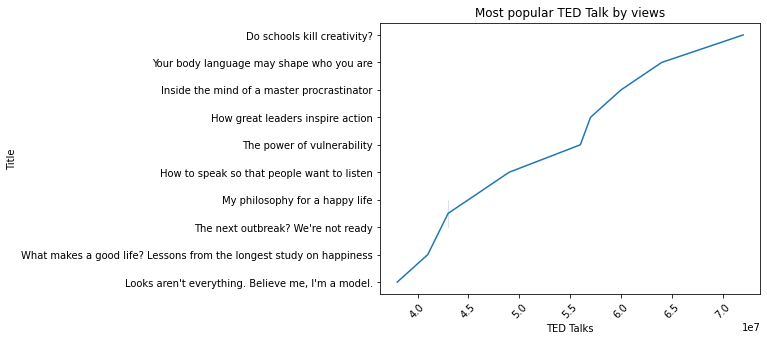

In [10]:
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
sns.lineplot( x = 'views' ,y = 'title', data = popular_talk_views)
plt.title('Most popular TED Talk by views')
plt.xlabel('TED Talks')
plt.ylabel('Title')
plt.xticks(rotation = 45)
plt.show()

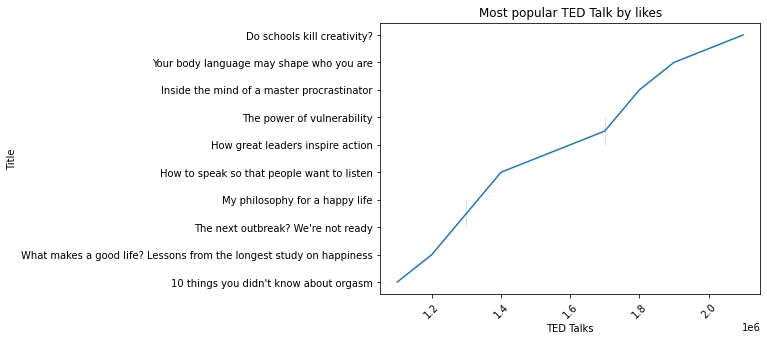

In [11]:
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
sns.lineplot( x = 'likes' ,y = 'title', data = popular_talk_likes)
plt.title('Most popular TED Talk by likes')
plt.xlabel('TED Talks')
plt.ylabel('Title')
plt.xticks(rotation = 45)
plt.show()

### 2. Finding most popular TED talks speakers (in terms of number of talks)

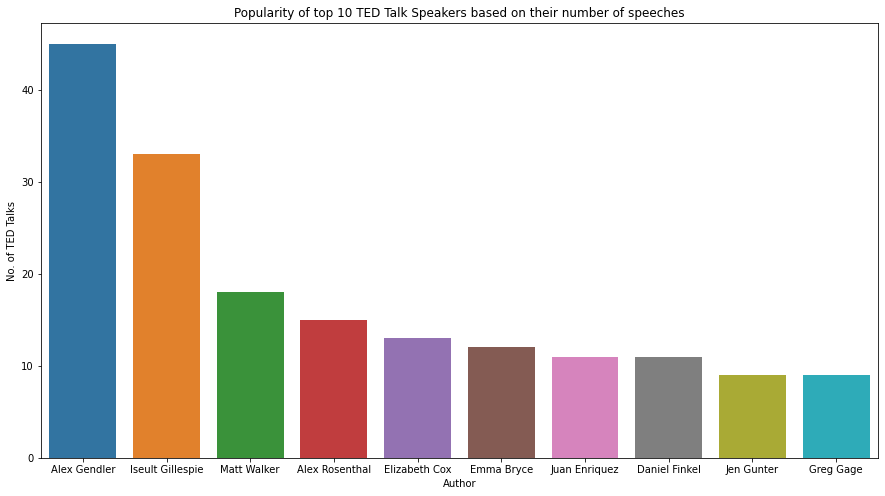

In [12]:
author = df['author'].value_counts().sort_values(ascending = False).index[:10]
plt.figure(figsize = (15,8))
sns.countplot(x = 'author', data = df , order = author)
plt.title('Popularity of top 10 TED Talk Speakers based on their number of speeches')
plt.xlabel('Author')
plt.ylabel('No. of TED Talks')
plt.show()

### 3. Month-wise analysis of TED talk frequency

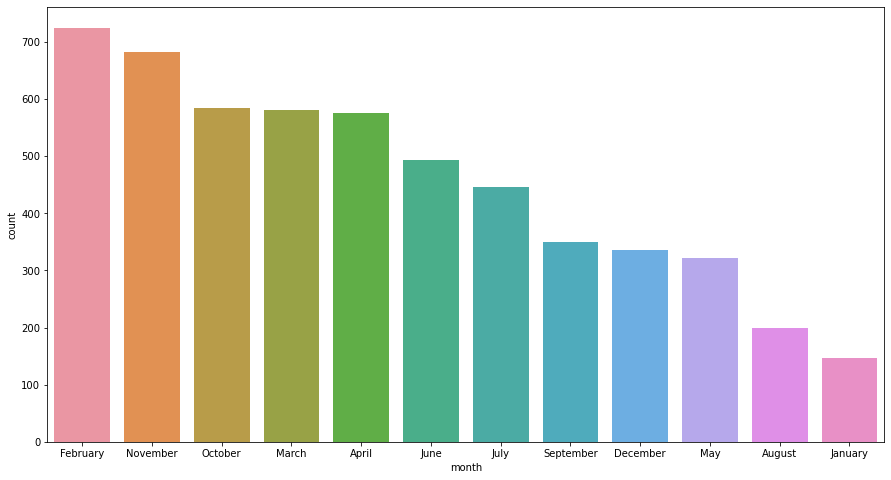

In [13]:
plt.figure(figsize = (15,8))
order = df['month'].value_counts().sort_values(ascending = False).index
sns.countplot(x = 'month', data = df, order = order)
plt.show()

### 4. Year-wise analysis of TED talk frequency

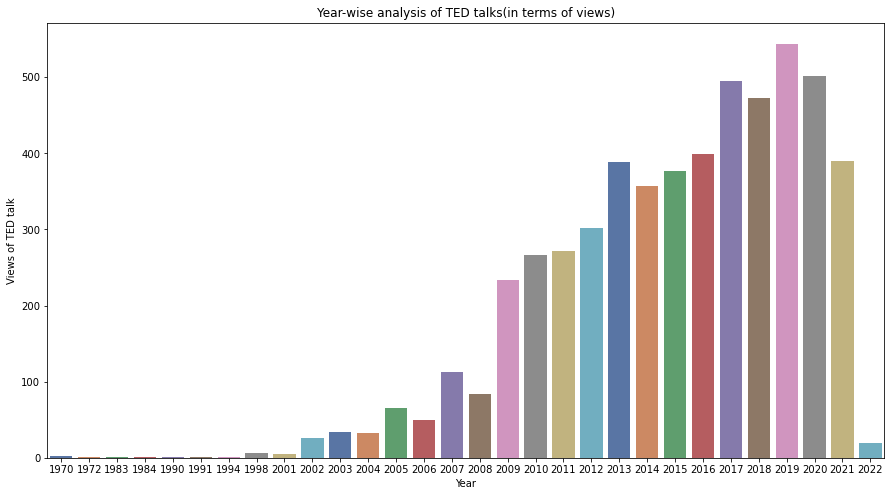

In [14]:
index = df['year'].value_counts().index
values = df['year'].value_counts().values

plt.figure(figsize = (15,8))
sns.barplot(x = index, y = values, palette = 'deep')
plt.title('Year-wise analysis of TED talks(in terms of views)')
plt.xlabel("Year")
plt.ylabel("Views of TED talk")
plt.show()

### 5. Finding TED Talks of your favourite Author

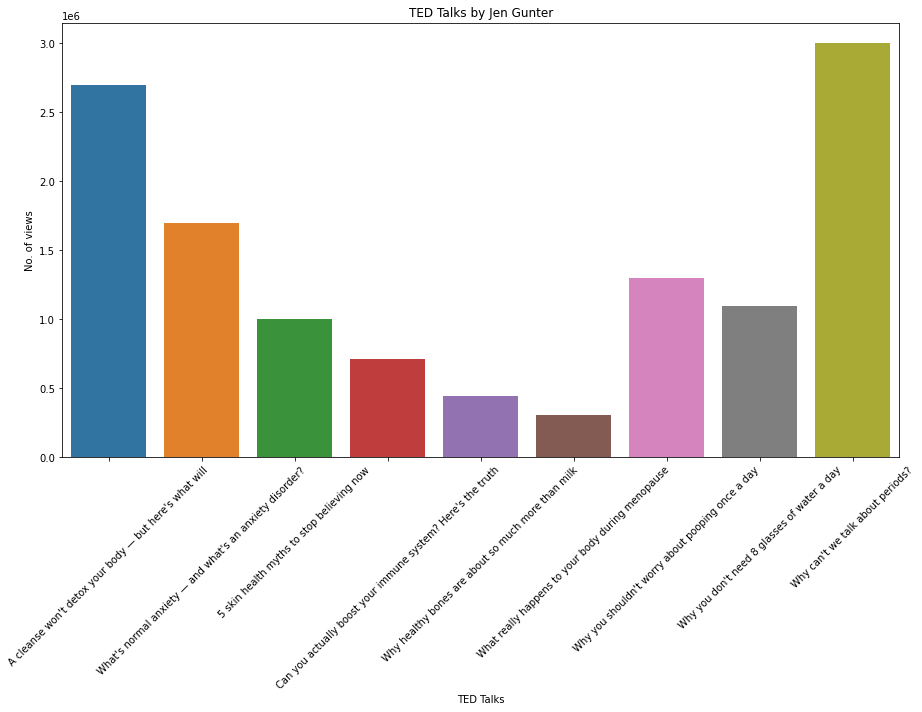

In [15]:
# My favourite TED Talk speaker is Jen Gunter so I am going with him

author = df[df['author'] == 'Jen Gunter']
plt.figure(figsize = (15,8))
sns.barplot(x = 'title', y = 'views' , data = author)
plt.title('TED Talks by Jen Gunter')
plt.xlabel('TED Talks')
plt.ylabel('No. of views')
plt.xticks(rotation = 45)
plt.show()

### 6. Finding TED Talks with the best like to view ratio

In [16]:
df['like_to_view'] = df['likes'] / df['views']

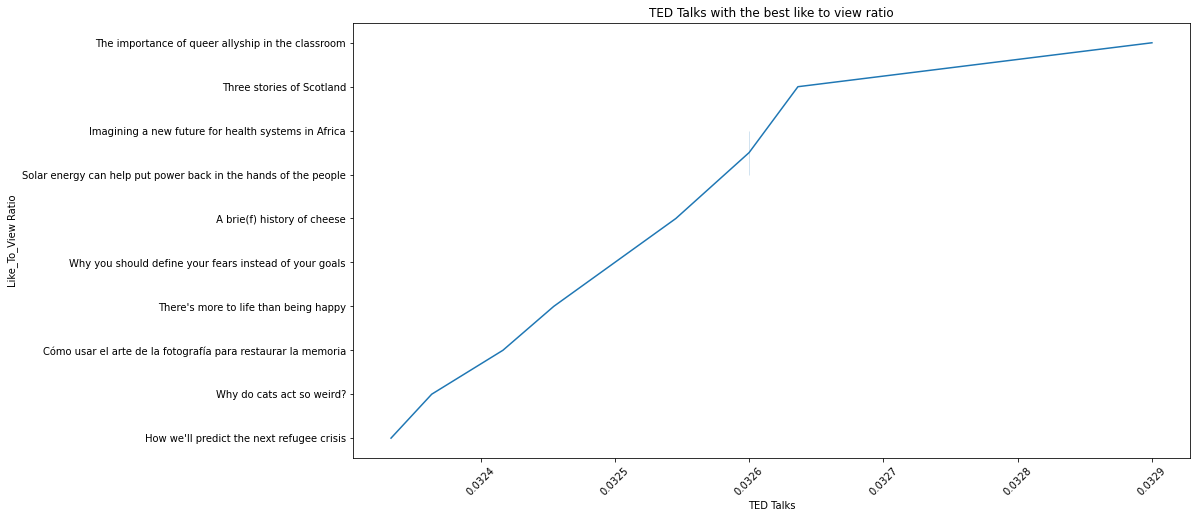

In [17]:
top_like_to_view = df.sort_values(by = 'like_to_view', ascending = False)[:10]
plt.figure(figsize = (15,8))
sns.lineplot(y = 'title', x = 'like_to_view' , data = top_like_to_view)
plt.title('TED Talks with the best like to view ratio')
plt.xlabel('TED Talks')
plt.ylabel('Like_To_View Ratio')
plt.xticks(rotation = 45)
plt.show()

### 7. Finding TED talks based on tags(like climate)

In [18]:
tag = df[df['title'].str.contains('climate')]
tag

,title,author,views,likes,link,month,year,like_to_view
3,Why is China appointing judges to combat clima...,James K. Thornton,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,October,2021,0.028103
17,The ocean's ingenious climate solutions,Susan Ruffo,522000,15000,https://ted.com/talks/susan_ruffo_the_ocean_s_...,October,2021,0.028736
18,How we're reducing the climate impact of elect...,Tim Dunn,96000,2900,https://ted.com/talks/tim_dunn_how_we_re_reduc...,February,2022,0.030208
34,How to boost nature-based solutions to climate...,Zac Goldsmith,30000,913,https://ted.com/talks/zac_goldsmith_how_to_boo...,October,2021,0.030433
44,"The unexpected, underwater plant fighting clim...",Carlos M. Duarte,786000,23000,https://ted.com/talks/carlos_m_duarte_the_unex...,August,2021,0.029262
...,...,...,...,...,...,...,...,...
4892,The science behind a climate headline,Rachel Pike,1000000,31000,https://ted.com/talks/rachel_pike_the_science_...,July,2009,0.031000
5226,New thinking on the climate crisis,Al Gore,2200000,68000,https://ted.com/talks/al_gore_new_thinking_on_...,March,2008,0.030909
5280,A critical look at geoengineering against clim...,David Keith,1400000,44000,https://ted.com/talks/david_keith_a_critical_l...,September,2007,0.031429
5389,Global priorities bigger than climate change,Bjorn Lomborg,1700000,53000,https://ted.com/talks/bjorn_lomborg_global_pri...,February,2005,0.031176


### 8. Finding the most popular TED talks speaker (in terms of number of views)

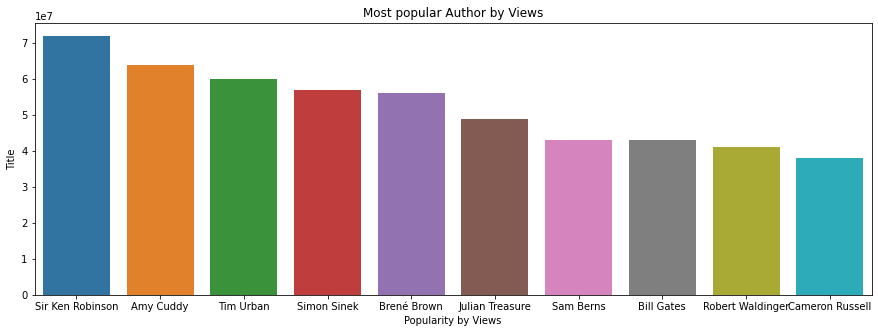

In [19]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'author', y = 'views' , data = popular_talk_views)
plt.title('Most popular Author by Views')
plt.xlabel('Popularity by Views')
plt.ylabel('Title')
plt.show()